In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
origin = "../SSVEP_data/"
file = "26"

In [10]:
timing = np.loadtxt(os.path.join(origin,file,"time.txt"),delimiter = ',',dtype = 'datetime64[ms]')
consignes = np.loadtxt(os.path.join(origin,file,"consignes.txt"),delimiter = ',',dtype = str)
logs = np.loadtxt(os.path.join(origin,file,"essai.txt"),delimiter = ',')

In [11]:
timing = timing[0:27]
logs = logs[0:27]

In [12]:
print(timing.shape,consignes.shape,logs.shape)

(27, 2) (72,) (27, 4)


In [7]:
raw_eeg = np.genfromtxt(os.path.join(origin,file,"{}.txt".format(file)),delimiter =',',skip_header = 5)
eeg = np.transpose(raw_eeg)
data = eeg[1:5]
data = mne.filter.notch_filter(data,Fs=200,freqs=50)
n_channels = 4
ch_names=['Fpz','O1','Oz','O2']
ch_types=['eog','eeg','eeg','eeg']
f_e=200 #Hz
info_data=mne.create_info(ch_names,ch_types=ch_types,sfreq=f_e)
print(info_data)
time=np.linspace(0,(1/f_e)*data.shape[1],data.shape[1]) #variable temps
#création du type Array
raw=mne.io.RawArray(data,info_data)
#set montage
montage=mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage,match_case=True)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 sec)

<Info | 7 non-empty values
 bads: []
 ch_names: Fpz, O1, Oz, O2
 chs: 1 EOG, 3 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 4
 projs: []
 sfreq: 200.0 Hz
>
Creating RawArray with float64 data, n_channels=4, n_times=292719
    Range : 0 ... 292718 =      0.000 ...  1463.590 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
/tmp/ipykernel_6931/2045989557.py:16: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['Fpz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage,match_case=True)


<RawArray | 4 x 292719 (1463.6 s), ~8.9 MB, data loaded>

In [13]:
raw.set_eeg_reference('average',projection = False, verbose = False)
raw.filter(l_freq=9.5,h_freq=20.5,fir_design = 'firwin', verbose = False)

<RawArray | 4 x 292719 (1463.6 s), ~8.9 MB, data loaded>

**ICA**

Using EOG channel: Fpz
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 54 significant peaks
Number of EOG events detected: 54
Not setting metadata
54 matching events found
No baseline correction applied
Using data from preloaded Raw for 54 events and 201 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


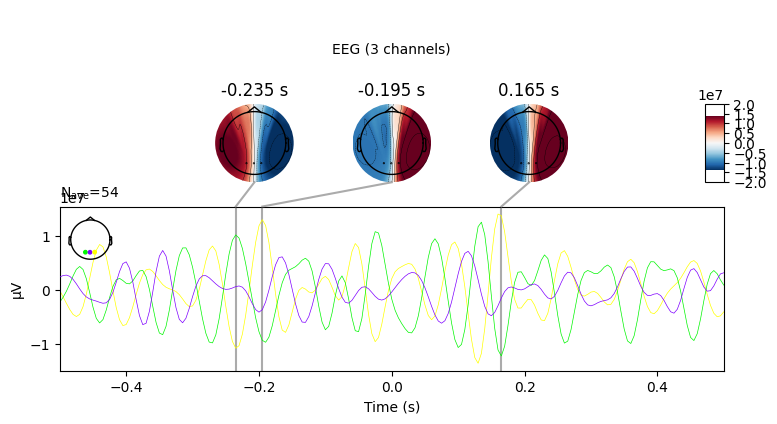

Using channel Oz to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2000 samples (10.000 sec)

Number of ECG events detected : 2292 (average pulse 93 / min.)
Not setting metadata
2292 matching events found
No baseline correction applied
Using data from preloaded Raw for 2292 events and 201 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


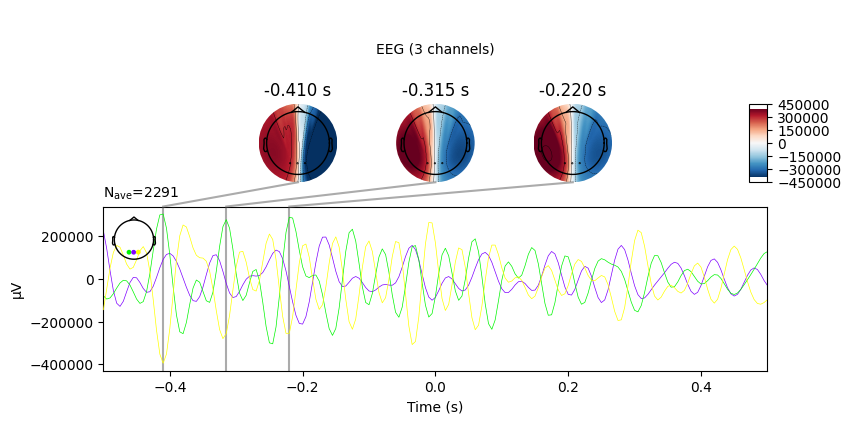

Fitting ICA to data using 3 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.2s.
Creating RawArray with float64 data, n_channels=3, n_times=292719
    Range : 0 ... 292718 =      0.000 ...  1463.590 secs
Ready.
Using matplotlib as 2D backend.


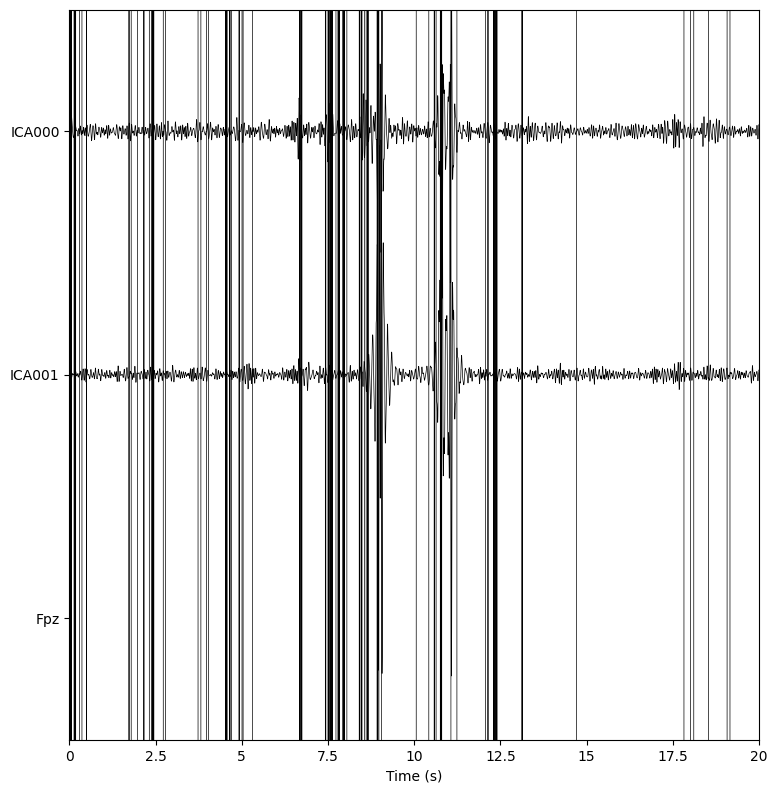

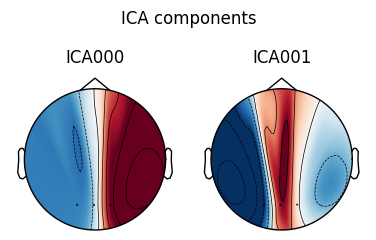

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 1 ICA component
    Projecting back using 3 PCA components


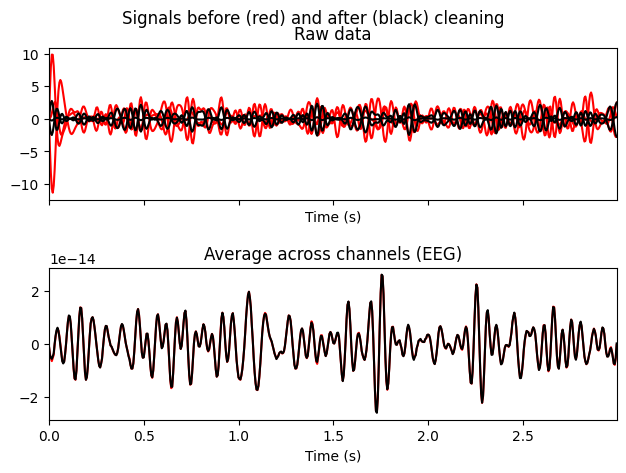

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 1 ICA component
    Projecting back using 3 PCA components
Using savgol length 21


<RawArray | 4 x 292719 (1463.6 s), ~8.9 MB, data loaded>

In [14]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs)
raw.load_data()
#summary of eog and ecg artefacts
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()
ecg_evoked = create_ecg_epochs(raw,ch_name='Oz').average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

raw_ica = raw.copy()

ica = ICA(n_components=2, max_iter='auto', random_state=None)
ica.fit(raw_ica)
ica
raw_ica.load_data()
ica.plot_sources(raw_ica, show_scrollbars=False)
ica.plot_components()

ica.plot_overlay(raw_ica, exclude=[0], picks='eeg')

ica.exclude = [1]
ica.apply(raw_ica)
raw_ica.savgol_filter(10,verbose = None)


**xDAWN**

In [15]:
from mne import (io, compute_raw_covariance, read_events, pick_types, Epochs)
from mne.preprocessing import Xdawn
from mne.viz import plot_epochs_image
signal_cov = compute_raw_covariance(raw,picks='eeg')
xd = Xdawn(n_components=2,signal_cov=signal_cov)

Using up to 7317 segments
Number of samples used : 292680
[done]


In [16]:
f_e = 200
diff = []
for k in range(timing.shape[0]):
    diff.append(timing[k][1]-timing[k][0])

offset = np.timedelta64(10,'s')
beginning = timing[0][0]-offset
print("début de l enregistrement = ",beginning)
a=timing[0][0]-beginning
a = a.astype('timedelta64[s]').astype(np.int32)
print("le premier affichage a lieu à ",a," seconds")

reperes = np.zeros((timing.shape))
window_analysis = 4
for k in range(timing.shape[0]):
    reperes[k][0]=np.int(((timing[k][0]-beginning).astype('timedelta64[s]').astype(np.int32) + window_analysis)*f_e)
    reperes[k][1]=np.int(((timing[k][1]-beginning).astype('timedelta64[s]').astype(np.int32) - window_analysis)*f_e)
print("La taille de la liste de reperes est ", reperes.shape, " et cette liste sert à la construction d'epochs")

début de l enregistrement =  2022-06-27T17:13:05.450
le premier affichage a lieu à  10  seconds
La taille de la liste de reperes est  (27, 2)  et cette liste sert à la construction d'epochs


/tmp/ipykernel_6931/2225478867.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  reperes[k][0]=np.int(((timing[k][0]-beginning).astype('timedelta64[s]').astype(np.int32) + window_analysis)*f_e)
/tmp/ipykernel_6931/2225478867.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, che

**Dictionnaire des events**

In [17]:
#fonction qui retourne la fréquence du bouton observé à l'instant k
def freq_to_check(k):
    if k <5:
        return 13
    if k >=5 and k <10:
        return 15
    if k >= 10 and k < 15:
        return 17
    if k >=15:
        if consignes[k-15]=='droite': #add -15
            return(logs[k][1])
        if consignes[k-15]=='gauche':
            return(logs[k][0])
    

In [18]:
events_id = np.ones((reperes.shape[0],1))
for k in range(reperes.shape[0]):
    #lumière
    if k>=6+15 and k<12+15: #add +
        #print(int(freq_to_check(k)))
        if int(freq_to_check(k))==13:
            
            events_id[k] = np.int64(131)
            print("lux à l'indice",k)
            print("------",events_id[k],"et en k 22",events_id[22])
        else:
            events_id[k] = np.int64(171)
    #distance
    elif k >=53 -15 and k < 69 -15:
        events_id[k]=int(str(int(freq_to_check(k)))+str(240))
    elif k >=69 -15 and k < 75-15:
        events_id[k]=int(str(int(freq_to_check(k)))+str(120))
        print(events_id[k])
    elif k >=75-15 and k < 81-15:
        events_id[k]=int(str(int(freq_to_check(k)))+str(800))
    elif k >=81-15 and k < 87-15:
        events_id[k]=int(str(int(freq_to_check(k)))+str(500))
    elif k < 15:
        events_id[k] = int(str(int(freq_to_check(k)))+str(0))
    elif k >=15 and k < 6+15:
        events_id[k] = freq_to_check(k)
  
#print("------",events_id[22])
print(reperes.shape,events_id.shape)
events=np.concatenate((reperes,events_id),axis = 1)
print(events[22])
events=events.astype(int)
print(events[22])
print(events.shape)


lux à l'indice 22
------ [131.] et en k 22 [131.]
lux à l'indice 24
------ [131.] et en k 22 [131.]
lux à l'indice 25
------ [131.] et en k 22 [131.]
(27, 2) (27, 1)
[2.470e+05 2.508e+05 1.310e+02]
[247000 250800    131]
(27, 3)


In [19]:
#event_dict = {'10 Hz': 10, '12Hz':12,'13 Hz': 13,'14 Hz': 14,'15 Hz': 15,'16 Hz': 16,'17 Hz': 17,'18 Hz': 18,'20 Hz': 20, '13 240':13240,'17 240':17240,'13 120':13120,'17 120':17120,'13 800':13800,'17 800':17800,'13 500':13500,'17 500':17500,} 
#'13 Hz lux': 131, '17 Hz lux' : 171,

In [20]:
#for 33
event_dict = {'13 Hz seul': 130,'15 Hz seul': 150,'17 Hz seul': 170,'13 Hz': 13,'17 Hz': 17,'13 lux':131,'17 lux':171 }#


In [21]:
epochs = mne.Epochs(raw, events=events,tmin=-5,tmax=12,baseline=(-5,0),picks = ['O2','Oz','O1'],verbose = False)
xd.fit(epochs)

Using data from preloaded Raw for 27 events and 3401 original time points ...
0 bad epochs dropped
Computing rank from data with rank='full'
    EEG: rank 3 from info
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 3 from info
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 3 from info
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 3 from info
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 3 from info
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 3 from info
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
 

Xdawn(None)

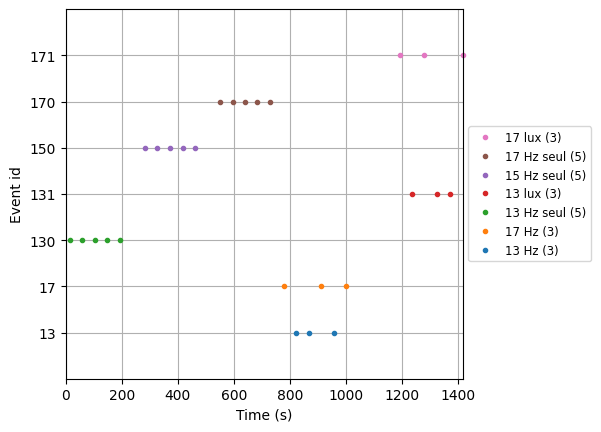

In [22]:
fig = mne.viz.plot_events(events, sfreq=200,
                          first_samp=raw.first_samp,event_id = event_dict) #,
fig.subplots_adjust(right=1)  # make room for legend

Using data from preloaded Raw for 5 events and 3401 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


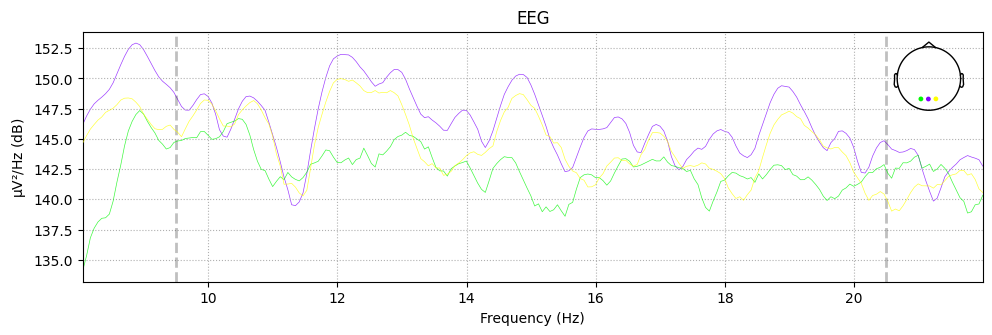

Using data from preloaded Raw for 5 events and 3401 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


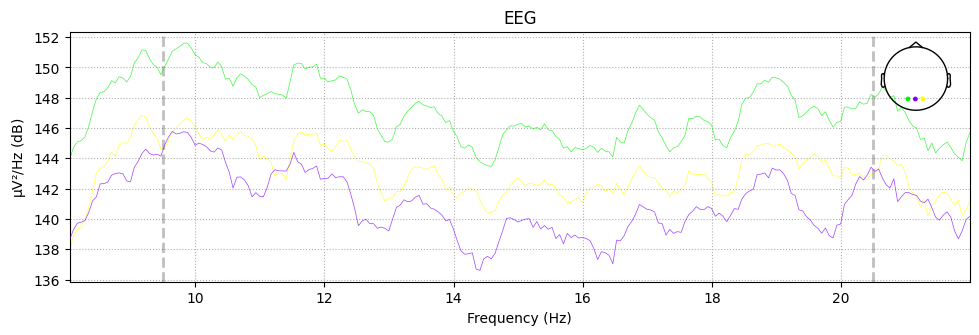

Using data from preloaded Raw for 5 events and 3401 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


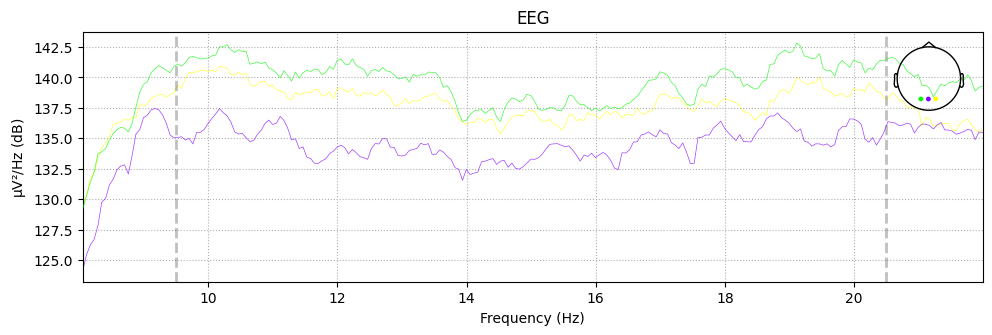

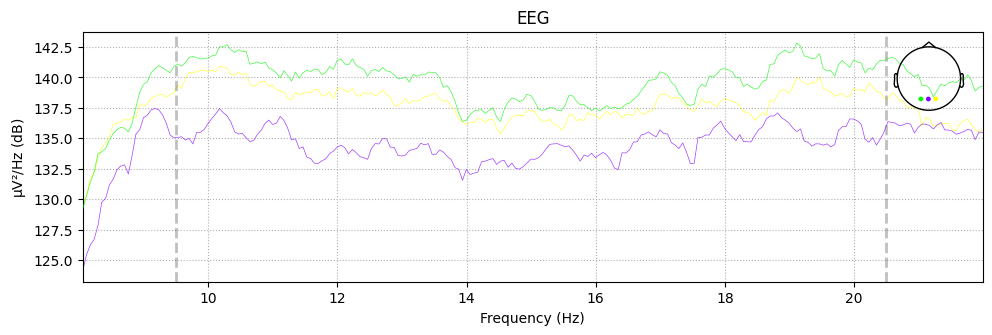

In [23]:
epochs['130'].plot_psd(picks='eeg',fmin=8,fmax=22)
epochs['150'].plot_psd(picks='eeg',fmin=8,fmax=22)
epochs['170'].plot_psd(picks='eeg',fmin=8,fmax=22)